# Overview of this notebook

Preliminary model fitting

# Importing Libraries and Loading Data

In [27]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import entropy
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [49]:
combined_df = pd.read_csv('ProcessedData/PreChoice_Processed_CombinedBehavioralEyetrackingData.csv')

In [50]:
combined_df.keys()

Index(['Subj', 'Trial', 'Game', 'Stim11', 'Stim12', 'Stim13', 'Stim21',
       'Stim22', 'Stim23', 'Stim31', 'Stim32', 'Stim33', 'Choice', 'Chosen1',
       'Chosen2', 'Chosen3', 'Unchosen1', 'Unchosen2', 'Unchosen3',
       'Unchosen4', 'Unchosen5', 'Unchosen6', 'Outcome', 'Dim', 'Feat',
       'CenterDim', 'CenterFeat', 'Correct', 'LearnedFeat', 'RT',
       'WithinGameTrial', 'PoL', 'Adult', 'Age', 'Block', 'Feature1',
       'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7',
       'Feature8', 'Feature9', 'Feature10', 'TotalLookingTime',
       'FeatureEntropy', 'Animals', 'Landscapes', 'Objects',
       'DimensionEntropy'],
      dtype='object')

In [51]:
# split into adult and adolescent
adole_combined_df = combined_df[combined_df['Adult'] == False].fillna(0)
adult_combined_df = combined_df[combined_df['Adult']].fillna(0)

# Summary Statistics

In [61]:
summary_df = pd.DataFrame()

In [53]:
combined_df.groupby('Subj')['PoL'].describe()

,count,mean,std,min,25%,50%,75%,max
Subj,,,,,,,,
23,320.0,7.625000,6.499337,1.0,2.00,6.0,11.00,20.0
26,360.0,10.611111,6.413243,1.0,5.00,9.5,18.00,20.0
27,300.0,7.866667,7.015193,1.0,1.00,6.0,15.00,20.0
28,340.0,8.058824,6.664931,1.0,1.00,7.0,13.00,19.0
29,240.0,8.583333,6.409438,1.0,4.00,7.0,13.00,20.0
30,220.0,10.909091,7.093048,2.0,4.00,12.0,19.00,20.0
31,320.0,9.125000,5.763087,1.0,5.00,8.5,12.50,20.0
34,240.0,11.083333,8.237666,1.0,1.75,13.0,19.00,20.0
35,340.0,10.411765,6.998178,1.0,4.00,10.0,17.00,20.0


In [62]:
summary_df['Age'] = combined_df.groupby('Subj')['Age'].describe()['mean']
summary_df['Mean_RT'] = combined_df.groupby('Subj')['RT'].describe()['mean']
summary_df['Mean_Feature1'] = combined_df.groupby('Subj')['Feature1'].describe()['mean']
summary_df['Mean_Feature2'] = combined_df.groupby('Subj')['Feature2'].describe()['mean']
summary_df['Mean_Feature3'] = combined_df.groupby('Subj')['Feature3'].describe()['mean']
summary_df['Mean_Feature4'] = combined_df.groupby('Subj')['Feature4'].describe()['mean']
summary_df['Mean_Feature5'] = combined_df.groupby('Subj')['Feature5'].describe()['mean']
summary_df['Mean_Feature6'] = combined_df.groupby('Subj')['Feature6'].describe()['mean']
summary_df['Mean_Feature7'] = combined_df.groupby('Subj')['Feature7'].describe()['mean']
summary_df['Mean_Feature8'] = combined_df.groupby('Subj')['Feature8'].describe()['mean']
summary_df['Mean_Feature9'] = combined_df.groupby('Subj')['Feature9'].describe()['mean']
summary_df['Mean_Feature10'] = combined_df.groupby('Subj')['Feature10'].describe()['mean']
summary_df['Mean_Animals'] = combined_df.groupby('Subj')['Animals'].describe()['mean']
summary_df['Mean_Landscapes'] = combined_df.groupby('Subj')['Landscapes'].describe()['mean']
summary_df['Mean_Objects'] = combined_df.groupby('Subj')['Objects'].describe()['mean']
summary_df['Mean_DimensionEntropy'] = combined_df.groupby('Subj')['DimensionEntropy'].describe()['mean']
summary_df['Mean_FeatureEntropy'] = combined_df.groupby('Subj')['FeatureEntropy'].describe()['mean']
summary_df['Mean_LookingTime'] = combined_df.groupby('Subj')['TotalLookingTime'].describe()['mean']
summary_df['Mean_Correct'] = combined_df.groupby('Subj')['Correct'].describe()['mean']
summary_df['LearnedFeat'] = combined_df.groupby('Subj')['LearnedFeat'].describe()['top']
summary_df['Mean_PoL'] = combined_df.groupby('Subj')['PoL'].describe()['mean']
summary_df = summary_df.reset_index()

In [65]:
summary_df.to_csv('ProcessedData/ProcessedSummaryStatisticsbySubject.csv', index=False)

In [63]:
entropy_col = []
for index, row in summary_df.iterrows():
    features = [row.Mean_Feature1, row.Mean_Feature2, row.Mean_Feature3, row.Mean_Feature4, row.Mean_Feature5, row.Mean_Feature6, row.Mean_Feature7, row.Mean_Feature8, row.Mean_Feature9]
    features = [feature/sum(features) for feature in features]
    curr_entropy = entropy(features, base=9)
    entropy_col.append(curr_entropy)
summary_df['MeanFeatureEntropy'] = entropy_col

entropy_col = []
for index, row in summary_df.iterrows():
    features = [row.Mean_Animals, row.Mean_Landscapes, row.Mean_Objects]
    features = [feature/sum(features) for feature in features]
    curr_entropy = entropy(features, base=3)
    entropy_col.append(curr_entropy)
summary_df['MeanDimensionEntropy'] = entropy_col

In [64]:
summary_df[['Subj']] = summary_df[['Subj']].astype(int)

## Mean Looking Times across Features

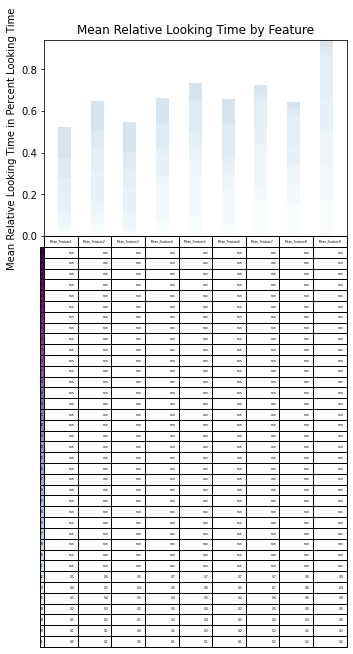

In [14]:
data = summary_df[['Subj','Mean_Feature1', 'Mean_Feature2','Mean_Feature3',
                    'Mean_Feature4','Mean_Feature5', 'Mean_Feature6',
                    'Mean_Feature7', 'Mean_Feature8', 'Mean_Feature9']].set_index('Subj')

# data_T = data.transpose()

rows = np.array(data.index.values)
columns = np.array(data.keys())
data.reset_index(drop=True)
# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 1, len(rows)))
n_rows = len(rows)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    curr_row = np.array(data.iloc[row])
    plt.bar(index, curr_row, bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + curr_row
    cell_text.append(['%1.1f' % x for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Mean Relative Looking Time in Percent Looking Time")
plt.xticks([])
plt.title('Mean Relative Looking Time by Feature')

plt.show()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


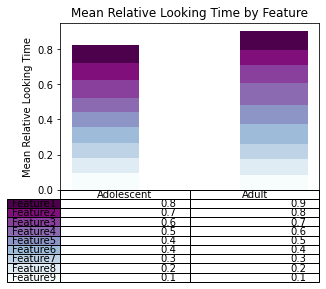

In [15]:
data = summary_df[['Subj','Age', 'Mean_Feature1', 'Mean_Feature2','Mean_Feature3',
                    'Mean_Feature4','Mean_Feature5', 'Mean_Feature6',
                    'Mean_Feature7', 'Mean_Feature8', 'Mean_Feature9']]

data.loc[data['Age'] >= 18,'AgeGroup'] = 'Adult'
data.loc[data['Age'] < 18,'AgeGroup'] = 'Adolescent'

plot_data = pd.DataFrame()
plot_data['Feature1'] = data.groupby('AgeGroup')['Mean_Feature1'].describe()['mean']
plot_data['Feature2'] = data.groupby('AgeGroup')['Mean_Feature2'].describe()['mean']
plot_data['Feature3'] = data.groupby('AgeGroup')['Mean_Feature3'].describe()['mean']
plot_data['Feature4'] = data.groupby('AgeGroup')['Mean_Feature4'].describe()['mean']
plot_data['Feature5'] = data.groupby('AgeGroup')['Mean_Feature5'].describe()['mean']
plot_data['Feature6'] = data.groupby('AgeGroup')['Mean_Feature6'].describe()['mean']
plot_data['Feature7'] = data.groupby('AgeGroup')['Mean_Feature7'].describe()['mean']
plot_data['Feature8'] = data.groupby('AgeGroup')['Mean_Feature8'].describe()['mean']
plot_data['Feature9'] = data.groupby('AgeGroup')['Mean_Feature9'].describe()['mean']

plot_data = plot_data.transpose()

rows = np.array(plot_data.index.values)
columns = np.array(plot_data.keys())
plot_data.reset_index(drop=True)

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 1, len(rows)))
n_rows = len(rows)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    curr_row = np.array(plot_data.iloc[row])
    plt.bar(index, curr_row, bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + curr_row
    cell_text.append(['%1.1f' % x for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.3, bottom=0.3)

plt.ylabel("Mean Relative Looking Time")
plt.xticks([])
plt.title('Mean Relative Looking Time by Feature')

plt.show()

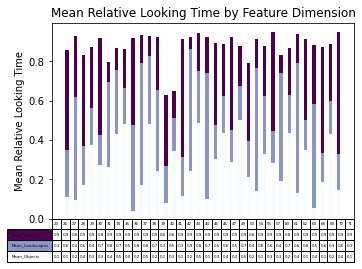

In [267]:
data = summary_df[['Subj','Mean_Animals', 'Mean_Landscapes','Mean_Objects']].set_index('Subj')

data = data.transpose()

rows = np.array(data.index.values)
columns = np.array(data.keys())
data.reset_index(drop=True)
# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 1, len(rows)))
n_rows = len(rows)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    curr_row = np.array(data.iloc[row])
    plt.bar(index, curr_row, bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + curr_row
    cell_text.append(['%1.1f' % x for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Mean Relative Looking Time")
plt.xticks([])
plt.title('Mean Relative Looking Time by Feature Dimension')

plt.show()

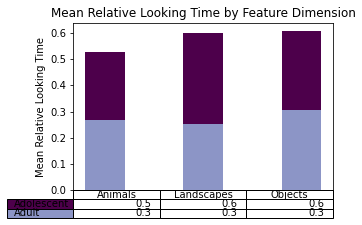

In [271]:
data = summary_df[['Subj','Age', 'Mean_Animals', 'Mean_Landscapes','Mean_Objects']]

data.loc[data['Age'] >= 18,'AgeGroup'] = 'Adult'
data.loc[data['Age'] < 18,'AgeGroup'] = 'Adolescent'

plot_data = pd.DataFrame()
plot_data['Animals'] = data.groupby('AgeGroup')['Mean_Animals'].describe()['mean']
plot_data['Landscapes'] = data.groupby('AgeGroup')['Mean_Landscapes'].describe()['mean']
plot_data['Objects'] = data.groupby('AgeGroup')['Mean_Objects'].describe()['mean']

# plot_data = plot_data.transpose()

rows = np.array(plot_data.index.values)
columns = np.array(plot_data.keys())
plot_data.reset_index(drop=True)

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0.5, 1, len(rows)))
n_rows = len(rows)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    curr_row = np.array(plot_data.iloc[row])
    plt.bar(index, curr_row, bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + curr_row
    cell_text.append(['%1.1f' % x for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.3, bottom=0.3)

plt.ylabel("Mean Relative Looking Time")
plt.xticks([])
plt.title('Mean Relative Looking Time by Feature Dimension')

plt.show()

# Fitting to Linear Models to See Trends

Slight Correlations between:
- RT*DimensionEntropy
- RT*FeatureEntropy
- Mean_LookingTime*Mean_RT
- Age*Mean_Feature10
- Age*Mean_Feature6

Sanity Check:
- Mean_DimensionEntropy*Mean_FeatureEntropy

In [59]:
summary_df

,Subj,Age,Mean_RT,Mean_Feature1,Mean_Feature2,Mean_Feature3,Mean_Feature4,Mean_Feature5,Mean_Feature6,Mean_Feature7,...,Mean_Landscapes,Mean_Objects,Mean_DimensionEntropy,Mean_FeatureEntropy,Mean_LookingTime,Mean_Correct,LearnedFeat,PoL,MeanFeatureEntropy,MeanDimensionEntropy
0,23,15.12,0.708218,0.029357,0.063100,0.017531,0.081563,0.094258,0.062075,0.176694,...,0.237896,0.512068,0.335526,0.250713,0.82742,0.7000,True,7.625000,0.911862,0.843990
1,26,23.32,0.743951,0.027267,0.042759,0.025830,0.162165,0.199369,0.161480,0.062721,...,0.523014,0.309958,0.336041,0.249948,0.92209,0.6500,True,10.611111,0.907009,0.841071
2,27,14.58,0.816314,0.047425,0.059199,0.066222,0.045419,0.074517,0.074661,0.198571,...,0.194598,0.465717,0.329737,0.240418,1.48734,0.6275,True,7.866667,0.938353,0.902134
3,28,14.00,0.787444,0.111616,0.143393,0.119420,0.089004,0.063321,0.036966,0.085037,...,0.189291,0.309821,0.317078,0.244733,1.15722,0.6925,True,8.058824,0.970660,0.966803
4,29,16.73,0.643196,0.063258,0.115705,0.091762,0.042157,0.067811,0.043469,0.126431,...,0.153437,0.496570,0.212998,0.169462,1.31167,0.5350,False,8.583333,0.938477,0.902526
5,30,17.48,0.740508,0.093441,0.085209,0.083232,0.124328,0.149913,0.159302,0.028205,...,0.433543,0.102289,0.256682,0.202922,0.94066,0.5500,False,10.909091,0.934897,0.874224
6,31,17.64,0.604654,0.149364,0.137162,0.144088,0.118811,0.085539,0.119288,0.047008,...,0.323638,0.111677,0.302463,0.229647,0.94438,0.6425,True,9.125000,0.942695,0.891473
7,34,23.16,0.755533,0.192398,0.145445,0.145781,0.073054,0.054365,0.055693,0.071931,...,0.183112,0.196193,0.306352,0.239171,0.97068,0.5025,False,11.083333,0.947187,0.901353
8,35,24.07,0.843784,0.012715,0.015896,0.011347,0.165453,0.111835,0.156578,0.142805,...,0.433867,0.443832,0.421017,0.338321,1.33005,0.6600,True,10.411765,0.879131,0.766376
9,36,16.73,0.775310,0.048513,0.077047,0.043550,0.226001,0.193481,0.201471,0.043909,...,0.620953,0.141518,0.363748,0.258494,1.33310,0.6725,True,8.941176,0.886572,0.788628


In [87]:
X_train2

array([[17.64],
       [15.12],
       [16.73],
       [14.  ],
       [21.06],
       [22.52],
       [20.15],
       [22.61]])

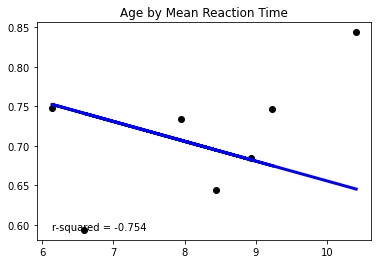

In [107]:
learned_summary_df = summary_df.loc[summary_df['LearnedFeat']]
X = np.array(learned_summary_df.Mean_PoL).reshape((-1,1))
y = np.array(learned_summary_df.Mean_RT)

shuffler = np.random.permutation(len(X))

X_shuffled = X[shuffler]
y_shuffled = y[shuffler]

# Split the data into training/testing sets
X_train1, X_train2, X_test = np.array_split(X_shuffled,3)

# Split the targets into training/testing sets
y_train1, y_train2, y_test = np.array_split(y_shuffled,3)

X_train = np.append(X_train1, X_train2).reshape(-1, 1)
y_train = np.append(y_train1, y_train2)

# fit to model and predict on test set
model = LinearRegression().fit(X=X_train, y=y_train)
y_pred = model.predict(X_test)

# plot
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.annotate("r-squared = {:.3f}".format(r2_score(y_test, y_pred)), (min(X_test), min(y_test)))
plt.title("Age by Mean Reaction Time")
plt.show()

# Fitting to Reinforcement Learning Models